In [0]:
# import dependencies
import warnings
import os
warnings.filterwarnings('ignore')
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
# Version of Tensorflow
tf.__version__

'1.11.0-rc2'

In [0]:
# import mnist dataset => 28X28 handwritten numbers 0-9
mnist = tf.keras.datasets.mnist 

In [0]:
# Load the dataset
(x_train,y_train) , (x_test, y_test) = mnist.load_data()


In [0]:
# Normalize the dataset
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

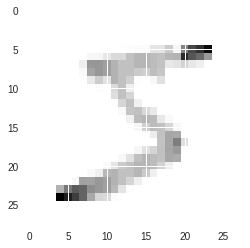

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [52]:
plt.imshow(x_train[0])
plt.show()
print(x_train[0])

In [0]:
# Architecture of our model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [40]:
# Training the model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 7s 111us/step - loss: 0.0632 - acc: 0.9798
Epoch 2/3
60000/60000 [==============================] - 7s 117us/step - loss: 0.0491 - acc: 0.9840
Epoch 3/3
60000/60000 [==============================] - 7s 119us/step - loss: 0.0388 - acc: 0.9874


In [53]:
val_loss, val_accu = model.evaluate(x_test, y_test)
print(val_loss , val_accu)

10000/10000 [==============================] - 0s 28us/step
0.18250698755718767 0.9546


In [0]:
# Saving the model
tf.keras.models.save_model(model, './epic_num_keras_classifier.model')

In [0]:
# Loading the saved model
my_epic_model = tf.keras.model.load('./epic_num_keras_classifier.h')

In [77]:
prediction = model.predict([x_test])
print(prediction)


[[3.2913180e-15 2.1755821e-11 7.2776130e-10 ... 1.0000000e+00
  7.5596637e-16 1.3639857e-12]
 [4.4330812e-15 6.7597663e-05 9.9993241e-01 ... 1.1950809e-12
  1.1305355e-11 1.2472341e-17]
 [1.7075936e-09 9.9975795e-01 2.4712655e-05 ... 1.2235284e-05
  1.9976773e-04 8.0288754e-07]
 ...
 [4.0019377e-16 2.2177751e-11 6.2389614e-15 ... 1.0421060e-08
  4.3491946e-12 7.0685519e-07]
 [2.1907539e-08 6.7823615e-11 2.6464914e-13 ... 4.3269218e-08
  4.7144366e-07 1.4830899e-09]
 [3.1944022e-10 1.5265597e-12 3.9790670e-08 ... 1.3136538e-13
  8.4715629e-10 1.5555997e-12]]


In [81]:
print('Predicted value ',np.argmax(prediction[0]))

Predicted value  7


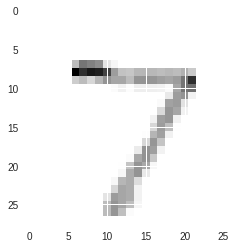

In [83]:
plt.imshow(x_test[0])
plt.show()

Predicted value  9


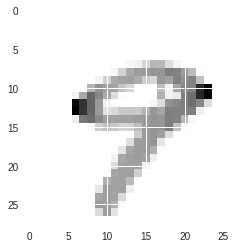

In [87]:
index = 9 #@param {type:"integer"}

print('Predicted value ',np.argmax(prediction[index]))
plt.imshow(x_test[index])
plt.show()